In [1]:
import gspread as gs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse

In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\lucyg\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [4]:
sa = gs.service_account(filename="enhanced-victor-363219-68e4353f5f23.json")
sheet = sa.open("Untitled form (Responses)")
work_sheet = sheet.worksheet("Form Responses 1")
df = pd.DataFrame(work_sheet.get_all_records())
df.head()

,Timestamp,sessionID,a score,b score,time elapse,"who caused death, 0 for left player, 1 for right, -1 none",death reason,level,"true for pass level, false for died",arrive check point time array,coin get time array,"inertia world for true, normal for false"
0,,,,,,,,,,,,
1,,,,,,,,,,,,
2,,,,,,,,,,,,
3,,,,,,,,,,,,
4,,,,,,,,,,,,


In [65]:
df['time elapse'] = pd.to_numeric(df['time elapse'])
df['a score'] = pd.to_numeric(df['a score'])
df['b score'] = pd.to_numeric(df['b score'])
df=df[df['time elapse'] <= 600]

df1 = df.dropna()
df1

,Timestamp,sessionID,a score,b score,time elapse,"who caused death, 0 for left player, 1 for right, -1 none",death reason,level,"true for pass level, false for died",arrive check point time array,coin get time array,"inertia world for true, normal for false"
23,9/21/2022 4:49:24,637993325496660845,0.0,0.0,14.0,,,,,,,
24,9/21/2022 4:53:44,637993328050186794,0.0,0.0,18.0,,,,,,,
25,9/21/2022 4:54:08,637993328438416579,0.0,0.0,4.0,,,,,,,
26,9/21/2022 4:55:31,637993329096890637,3.0,0.0,21.0,,,,,,,
27,9/21/2022 5:03:50,637993334216644963,0.0,0.0,8.0,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
1925,10/24/2022 11:20:23,638022000000000000.0,0.0,1.0,3.0,1,Touch different Color,Level1,FALSE,0,10000000000,FALSE
1926,10/24/2022 13:35:42,638022000000000000.0,0.0,0.0,18.0,1,Touch different Color,Level1,FALSE,0,0,FALSE
1927,10/24/2022 13:36:02,638022000000000000.0,0.0,0.0,9.0,1,Touch different Color,Level1,FALSE,0,0,FALSE
1928,10/24/2022 16:11:13,638022000000000000.0,3.0,3.0,51.0,-1,,Level0,TRUE,0,312738424849000000,FALSE


In [ ]:
user = df1.groupby(['sessionID']).size()
user.unique()

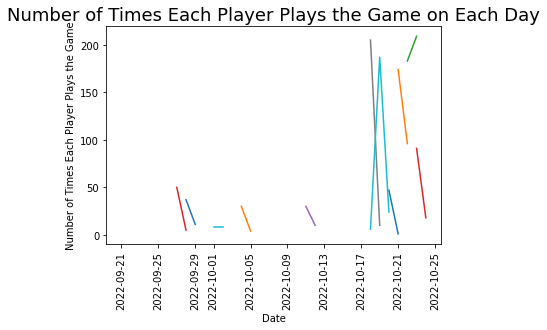

In [52]:
dates=[]
for i in df1['Timestamp']:
    datetime_object = parse(i)
    dates.append(datetime_object.date())
df1['dates']=dates
user = df1.groupby(['dates', 'sessionID']).size()
user=user.to_frame()
user.reset_index(inplace=True)
user = user.rename(columns = {0:'count'})
for i in user['sessionID'].unique():
    session=user[user['sessionID']==i]
    plt.plot(session['dates'], session['count'], label = i)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.xlabel("Date")
plt.ylabel("Number of Times Each Player Plays the Game")
plt.title("Number of Times Each Player Plays the Game on Each Day",fontsize=18)
plt.show()

In [66]:
df1=df1.iloc[861:]
df1

,Timestamp,sessionID,a score,b score,time elapse,"who caused death, 0 for left player, 1 for right, -1 none",death reason,level,"true for pass level, false for died",arrive check point time array,coin get time array,"inertia world for true, normal for false"
886,10/19/2022 0:56:37,638017000000000000.0,1.0,0.0,40.0,1,Touch different Color,Level0,FALSE,0,3600000000000,FALSE
887,10/19/2022 0:57:07,638017000000000000.0,3.0,3.0,27.0,-1,,Level0,TRUE,0,316621925000000,FALSE
888,10/19/2022 0:58:34,638017000000000000.0,3.0,3.0,86.0,-1,,Level0.1,TRUE,184200000000,162340286074000000,FALSE
889,10/19/2022 0:59:51,638017000000000000.0,6.0,6.0,77.0,-1,,Level1,TRUE,60000000000,3119152622494150386864,FALSE
890,10/19/2022 1:00:59,638017000000000000.0,5.0,4.0,65.0,1,Touch Enemy,Level2,FALSE,213100000000,101523182629534906000,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...
1925,10/24/2022 11:20:23,638022000000000000.0,0.0,1.0,3.0,1,Touch different Color,Level1,FALSE,0,10000000000,FALSE
1926,10/24/2022 13:35:42,638022000000000000.0,0.0,0.0,18.0,1,Touch different Color,Level1,FALSE,0,0,FALSE
1927,10/24/2022 13:36:02,638022000000000000.0,0.0,0.0,9.0,1,Touch different Color,Level1,FALSE,0,0,FALSE
1928,10/24/2022 16:11:13,638022000000000000.0,3.0,3.0,51.0,-1,,Level0,TRUE,0,312738424849000000,FALSE


In [69]:
df1['who caused death, 0 for left player, 1 for right, -1 none'].unique()[0]

1

In [19]:
#df1['total score'] =
df1['total score']=df1['a score'] + df1['b score']
for i in ['Level0.1', 'Level0', 'Level1', 'Level2', 'Level3']:
    print(i)
    levelDf=df1[df1['level']==i]
    rank=levelDf.groupby(['sessionID'])['total score'].mean()
    rank=rank.to_frame()
    rank.reset_index(inplace=True)    
    rank['sessionID'] = rank['sessionID'].apply(str)
    rank=rank.sort_values(by='total score', ascending=False)  
    rank = rank.rename(columns = {'sessionID':'userID'})
    display(rank.head(5))

Level0.1


C:\Users\lucyg\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,userID,total score
0,6.38017e+17,6.000000
4,6.38021e+17,4.500000
1,6.38018e+17,4.470588
5,6.38022e+17,4.000000
3,6.3802e+17,3.280000


Level0


,userID,total score
2,6.38019e+17,5.000000
3,6.3802e+17,3.931818
5,6.38022e+17,3.904762
4,6.38021e+17,3.689655
0,6.38017e+17,3.500000


Level1


,userID,total score
0,6.38017e+17,12.000000
3,6.3802e+17,4.340000
4,6.38021e+17,3.875000
5,6.38022e+17,3.041667
2,6.38019e+17,2.500000


Level2


,userID,total score
0,6.38017e+17,9.333333
3,6.3802e+17,6.037037
2,6.38019e+17,5.000000
5,6.38022e+17,3.833333
1,6.38018e+17,2.916667


Level3


,userID,total score
2,6.3802e+17,2.030303
0,6.38017e+17,2.000000
3,6.38021e+17,1.880000
4,6.38022e+17,1.368421
1,6.38018e+17,0.646552


In [37]:
df1.head(100)

,Timestamp,sessionID,a score,b score,time elapse,"who caused death, 0 for left player, 1 for right, -1 none",death reason,level,"true for pass level, false for died",arrive check point time array,coin get time array,dates
23,9/21/2022 4:49:24,637993325496660845,0.0,0.0,14.0,,,,,,,2022-09-21
24,9/21/2022 4:53:44,637993328050186794,0.0,0.0,18.0,,,,,,,2022-09-21
25,9/21/2022 4:54:08,637993328438416579,0.0,0.0,4.0,,,,,,,2022-09-21
26,9/21/2022 4:55:31,637993329096890637,3.0,0.0,21.0,,,,,,,2022-09-21
27,9/21/2022 5:03:50,637993334216644963,0.0,0.0,8.0,,,,,,,2022-09-21
...,...,...,...,...,...,...,...,...,...,...,...,...
118,9/27/2022 14:31:20,637999000000000000.0,0.0,1.0,36.0,1,Fall,,,,,2022-09-27
119,9/27/2022 14:32:58,637999000000000000.0,0.0,1.0,9.0,1,Fall,,,,,2022-09-27
120,9/27/2022 14:34:25,637999000000000000.0,0.0,0.0,2.0,1,Touch different Color,,,,,2022-09-27
121,9/27/2022 14:34:33,637999000000000000.0,0.0,0.0,4.0,0,Touch different Color,,,,,2022-09-27


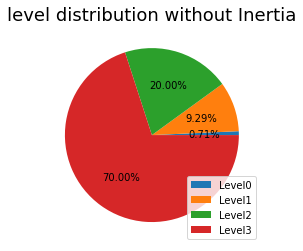

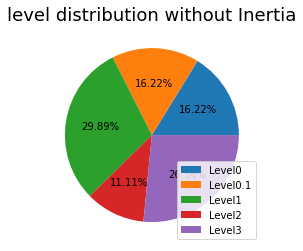

In [31]:

for i in (['TRUE', 'FALSE']):
        level=df1[df1['level']!='']
        level=level[level['inertia world for true, normal for false']==i]
        df2 = level.groupby(['level']).size()
        plt.title("level distribution without Inertia",fontsize=18)
        patches, text1, text2 = plt.pie(df2, autopct=lambda p: '{:.2f}%'.format(p,(p/100)*df2.sum()))
        plt.legend(patches, df2.index, loc="lower right")
        plt.show()

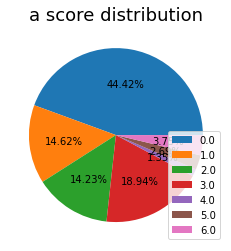

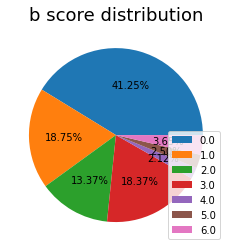

In [21]:
    for i in (['a score', 'b score']):
        #level = df1[df1['level']==j]
        df2 = df1.groupby([i]).size()
        plt.title(i + " distribution",fontsize=18)
        patches, text1, text2 = plt.pie(df2, autopct=lambda p: '{:.2f}%'.format(p,(p/100)*df2.sum()))
        plt.legend(patches, df2.index, loc="lower right")
        plt.show()

Text(0.5, 1.0, 'Survival Time for Each Player')

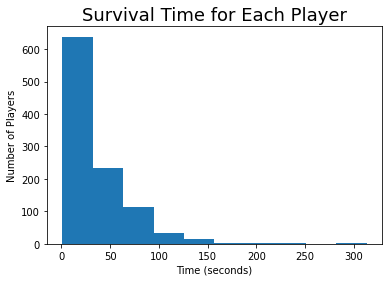

In [22]:
plt.hist(df1['time elapse'])
plt.xlabel("Time (seconds)")
plt.ylabel("Number of Players")
plt.title("Survival Time for Each Player",fontsize=18)

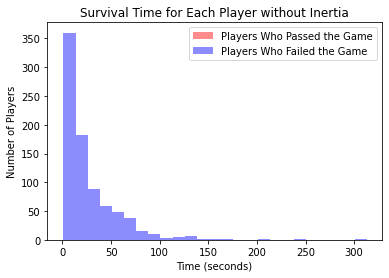

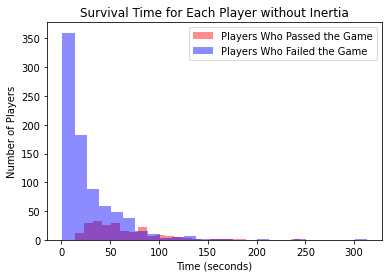

In [33]:
# plotting two histograms on the same axis
for i in (['TRUE', 'FALSE']):        
        passed=df1[df1['true for pass level, false for died'] == 'TRUE']
        passed=passed[passed['inertia world for true, normal for false']==i]
        notPassed=df1[df1['true for pass level, false for died'] == 'FALSE']
        plt.hist(passed['time elapse'], bins=25, alpha=0.45, color='red')
        plt.hist(notPassed['time elapse'], bins=25, alpha=0.45, color='blue')

        plt.title("Survival Time for Each Player without Inertia")

        plt.legend(['Players Who Passed the Game', 
                    'Players Who Failed the Game'])
        plt.xlabel("Time (seconds)")
        plt.ylabel("Number of Players")  
        plt.show()

,Fall,level,Touch different Color,Touch Enemy
0,1.0,Level0,NaN,NaN
1,NaN,Level0.1,NaN,NaN
2,3.0,Level1,10.0,NaN
3,26.0,Level2,2.0,NaN
4,91.0,Level3,4.0,3.0


,Fall,Touch different Color,level,Touch Enemy
0,7,58.0,Level0,NaN
1,32,NaN,Level0.1,67.0
2,89,133.0,Level1,NaN
3,30,10.0,Level2,34.0
4,171,15.0,Level3,39.0


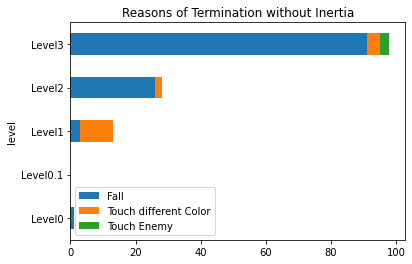

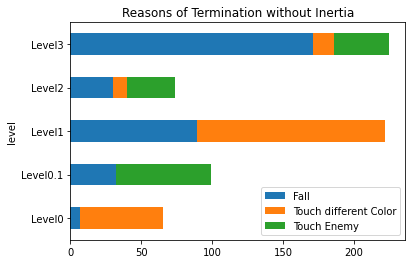

In [82]:
for i in ["TRUE", "FALSE"]:
    inertia=df1[df1['inertia world for true, normal for false']==i]
    data=[]
    for j in (['Level0', 'Level0.1', 'Level1', 'Level2', 'Level3']):
        level = inertia[inertia['level']==j]
        df3 = level[level['death reason'] != '']
        df4 = df3.groupby(['death reason']).size()
        dictionary=df4.to_dict()
        dictionary['level']=j
        data.append(dictionary)
    deathReason = pd.DataFrame(data)
    deathReason.plot(
        x = 'level',
        kind = 'barh',
        stacked = True,
        title = 'Reasons of Termination without Inertia', #stacked bar chart
        mark_right = True)
    deathReason.set_index('level')
    display(deathReason)

In [25]:
deathReason.set_index('level')

,Fall,Touch different Color,Touch Enemy
level,,,
Level0,8,58.0,NaN
Level0.1,32,NaN,67.0
Level1,92,143.0,NaN
Level2,56,12.0,34.0
Level3,262,19.0,42.0


C:\Users\lucyg\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


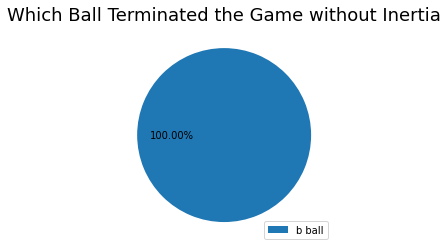

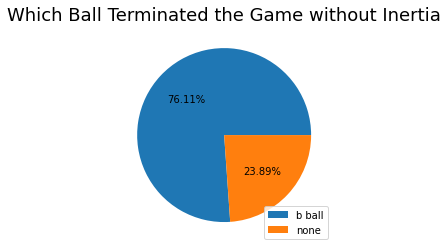

In [74]:
for i in ["TRUE", "FALSE"]:
    whoCausedDeath = df1['who caused death, 0 for left player, 1 for right, -1 none'].map({1: 'b ball', 0: 'a ball', -1: 'none'})
    df6=df1
    df6["who caused death"] = whoCausedDeath
    df6=df6[df6['inertia world for true, normal for false']==i]
    df5 = df6.groupby(['who caused death']).size()
    plt.title("Which Ball Terminated the Game without Inertia",fontsize=18)
    patches, text1, text2 = plt.pie(df5, autopct=lambda p: '{:.2f}%'.format(p,(p/100)*df5.sum()))
    plt.legend(patches, df5.index, loc="lower right")
    plt.show()

In [41]:
df3

,Timestamp,sessionID,a score,b score,time elapse,"who caused death, 0 for left player, 1 for right, -1 none",death reason,level,"true for pass level, false for died",arrive check point time array,coin get time array,"inertia world for true, normal for false",dates,total score
893,10/19/2022 1:03:50,638017000000000000.0,0.0,0.0,8.0,NaN,Fall,Level3,FALSE,0,0,FALSE,2022-10-19,0.0
894,10/19/2022 1:03:50,638017000000000000.0,0.0,0.0,8.0,NaN,Fall,Level3,FALSE,0,0,FALSE,2022-10-19,0.0
903,10/19/2022 10:38:44,638018000000000000.0,1.0,2.0,50.0,NaN,Touch different Color,Level3,FALSE,18000000000,3800032000000,FALSE,2022-10-19,3.0
921,10/19/2022 14:50:03,638018000000000000.0,2.0,1.0,31.0,NaN,Fall,Level3,FALSE,15000000000,8400120000000,FALSE,2022-10-19,3.0
924,10/19/2022 14:56:24,638018000000000000.0,2.0,1.0,19.0,NaN,Fall,Level3,FALSE,14000000000,8400120000000,FALSE,2022-10-19,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,10/23/2022 22:43:51,638022000000000000.0,0.0,1.0,20.0,NaN,Fall,Level3,FALSE,0,180000000000,FALSE,2022-10-23,1.0
1893,10/23/2022 22:43:51,638022000000000000.0,0.0,0.0,20.0,NaN,Fall,Level3,FALSE,0,180000000000,FALSE,2022-10-23,0.0
1894,10/23/2022 22:46:06,638022000000000000.0,2.0,2.0,133.0,NaN,Touch Enemy,Level3,FALSE,105000000000,1007400104123000000,FALSE,2022-10-23,4.0
1895,10/23/2022 22:50:13,638022000000000000.0,3.0,0.0,244.0,NaN,Fall,Level3,FALSE,1512900000000,62314701231000000,FALSE,2022-10-23,3.0


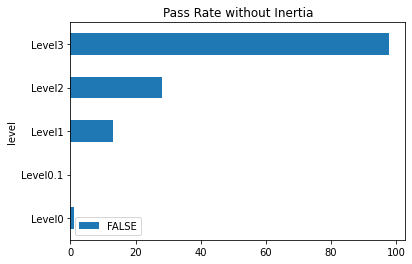

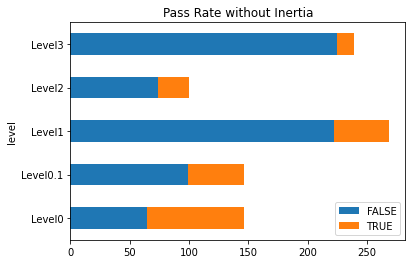

In [85]:
for i in ["TRUE", "FALSE"]:
    inertia=df1[df1['inertia world for true, normal for false']==i]
    data=[]
    for j in (['Level0', 'Level0.1', 'Level1', 'Level2', 'Level3']):
        level=inertia[inertia['level']==j]
        df2 = level.groupby(['true for pass level, false for died']).size()
        dictionary=df2.to_dict()
        dictionary['level']=j
        data.append(dictionary)

    passRate = pd.DataFrame(data)
    passRate.plot(
        x = 'level',
        kind = 'barh',
        stacked = True,
        title = 'Pass Rate without Inertia', #stacked bar chart
        mark_right = True)

In [29]:
df1['inertia world for true, normal for false'].unique()

array(['FALSE', 'TRUE'], dtype=object)